In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.set_option("display.max_columns", None)

## EDA Runtime Minutes
#### Goals

Runtime minutes are the average minutes for each episode for each show.

- Get descriptive statistics for the runtime minutes of tv shows for each streaming service.

- Plot data.

- Compare findings.

-----

### 1. Hulu
#### i. Import data

In [2]:
hulu = pd.read_pickle("Data_Hulu_Disney/hulu_final_clean.pkl")

In [3]:
hulu.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,Rick and Morty,2013,18.0,9.2,tt2861424,tvSeries,Rick and Morty,Rick and Morty,2013.0,2013.0,23.0,"Adventure,Animation,Comedy"
1,Fargo,2014,18.0,8.9,tt2802850,tvSeries,Fargo,Fargo,2014.0,2014.0,53.0,"Crime,Drama,Thriller"
2,Vikings,2013,18.0,8.5,tt2306299,tvSeries,Vikings,Vikings,2013.0,2013.0,44.0,"Action,Adventure,Drama"
3,Brooklyn Nine-Nine,2013,16.0,8.4,tt2467372,tvSeries,Brooklyn Nine-Nine,Brooklyn Nine-Nine,2013.0,2013.0,22.0,"Comedy,Crime"
4,Community,2009,7.0,8.5,tt1439629,tvSeries,Community,Community,2009.0,2009.0,22.0,Comedy


First, we will look at what are the longest runtime minutes.

In [4]:
hulu["runtimeMinutes"].sort_values(ascending=False).head(20)

742     584.0
311     510.0
194     492.0
853     391.0
39      350.0
532     346.0
28      327.0
844     303.0
1009    258.0
265     230.0
664     210.0
145     207.0
407     192.0
245     180.0
696     180.0
196     152.0
1295    122.0
592     120.0
746     120.0
636     120.0
Name: runtimeMinutes, dtype: float64

Some values from runtime minutes are taking into account all the episodes of the series, this could skew our values and not give us meaningful information. We will remove shows with runtime minutes higher than 100 from our data frame for this analysis for all streaming services.

We will also remove null values.

In [5]:
hulu_runtime = hulu[hulu["runtimeMinutes"] <= 100][["show", "runtimeMinutes"]].reset_index(drop=True)

hulu_runtime = hulu_runtime[~hulu_runtime["runtimeMinutes"].isna()].reset_index(drop=True)

hulu_runtime.head()

,show,runtimeMinutes
0,Rick and Morty,23.0
1,Fargo,53.0
2,Vikings,44.0
3,Brooklyn Nine-Nine,22.0
4,Community,22.0


In [6]:
len(hulu_runtime) / len(hulu)

0.7967257844474761

We will be working with 79% of our data.

#### ii. Descriptive Statistics

In [7]:
hulu_runtime["runtimeMinutes"].describe()

count    1168.000000
mean       38.259418
std        16.386987
min         3.000000
25%        24.000000
50%        30.000000
75%        55.000000
max        93.000000
Name: runtimeMinutes, dtype: float64

From the descriptive statistics we can see the following:

- The tv shows provided by hulu last in average 38 minutes per episode.
- 25% of the tv shows last 24 minutes or less.
- 50% of the tv shows last 30 minutes or more.
- 25% of the tv shows last 55 minutes or more.
- The minimum is of 3 minutes and the highest is of 93 minutes.

#### ii. Plotting


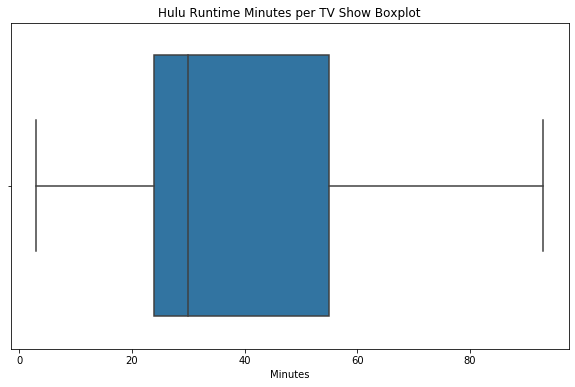

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(hulu_runtime["runtimeMinutes"])
ax.set_title("Hulu Runtime Minutes per TV Show Boxplot")
ax.set_xlabel("Minutes");

We can see from the boxplot above that most of Hulu's TV shows last from 20 minutes to 55 minutes, with a median of 30 minutes.

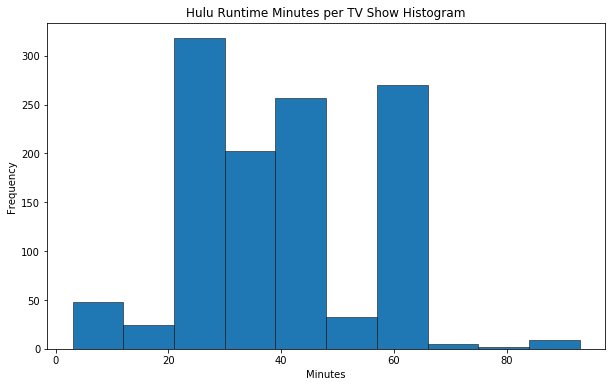

In [18]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(hulu_runtime["runtimeMinutes"], ec="black", lw=0.5)
ax.set_title("Hulu Runtime Minutes per TV Show Histogram")
ax.set_xlabel("Minutes")
ax.set_ylabel("Frequency");

From the histogram we can see that most of the TV shows last between 20 and 30 minutes, followed by 40 to 60 minutes.

-------

### 2. Disney+
#### i. Import data

In [10]:
disney = pd.read_pickle("Data_Hulu_Disney/disney_final_clean.pkl")

In [11]:
disney.head()

,show,year,age,imdb_rating,imdb_id,titleType,primaryTitle,originalTitle,startYear,endYear,runtimeMinutes,genres
0,The Mandalorian,2019,7.0,8.7,tt8111088,tvSeries,The Mandalorian,The Mandalorian,2019.0,2019.0,30.0,"Action,Adventure,Sci-Fi"
1,The Simpsons,1989,7.0,8.7,tt0096697,tvSeries,The Simpsons,The Simpsons,1989.0,1989.0,22.0,"Animation,Comedy"
2,Gravity Falls,2012,7.0,8.9,tt1865718,tvSeries,Gravity Falls,Gravity Falls,2012.0,2012.0,23.0,"Action,Adventure,Animation"
3,Star Wars: The Clone Wars,2008,7.0,8.2,tt0458290,tvSeries,Star Wars: The Clone Wars,Star Wars: The Clone Wars,2008.0,2008.0,23.0,"Action,Adventure,Animation"
4,DuckTales,2017,7.0,8.2,tt5531466,tvSeries,DuckTales,DuckTales,2017.0,2017.0,21.0,"Action,Adventure,Animation"


In [12]:
disney_runtime = disney[disney["runtimeMinutes"] <= 100][["show", "runtimeMinutes"]].reset_index(drop=True)

disney_runtime = disney_runtime[~disney_runtime["runtimeMinutes"].isna()].reset_index(drop=True)

disney_runtime.head()

,show,runtimeMinutes
0,The Mandalorian,30.0
1,The Simpsons,22.0
2,Gravity Falls,23.0
3,Star Wars: The Clone Wars,23.0
4,DuckTales,21.0


In [13]:
len(disney_runtime) / len(disney)

0.8421052631578947

We will be working with 84% of our data.

#### ii. Descriptive Statistics

In [15]:
disney_runtime["runtimeMinutes"].describe()

count    128.000000
mean      28.046875
std        9.877087
min        4.000000
25%       22.000000
50%       25.000000
75%       30.000000
max       60.000000
Name: runtimeMinutes, dtype: float64

From the descriptive statistics we can see the following:

- The tv shows provided by disney+ last in average 28 minutes per episode.
- 25% of the tv shows last 22 minutes or less.
- 50% of the tv shows last 25 minutes or more.
- 25% of the tv shows last 30 minutes or more.
- The minimum is of 4 minutes and the highest is of 60 minutes.

#### ii. Plotting


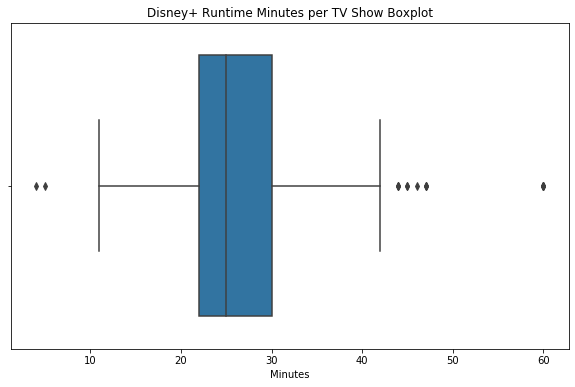

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(disney_runtime["runtimeMinutes"])
ax.set_title("Disney+ Runtime Minutes per TV Show Boxplot")
ax.set_xlabel("Minutes");

We can see from the boxplot above that most of Disney+'s TV shows last from 20 minutes to 30 minutes, with a median of 25 minutes. There are some outliers with less tahn 10 minutes and more than 43 minutes.

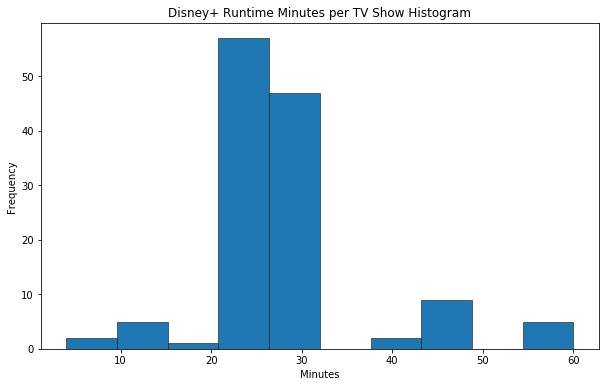

In [19]:
fig, ax = plt.subplots(figsize=(10,6))

plt.hist(disney_runtime["runtimeMinutes"], ec="black", lw=0.5)
ax.set_title("Disney+ Runtime Minutes per TV Show Histogram")
ax.set_xlabel("Minutes")
ax.set_ylabel("Frequency");

From the histogram we can see that most of the TV shows last between 20 and 30 minutes, having very few shows that last longer or smaller than that.

### 3. Comparison

#### i. Import data

In [20]:
runtime_minutes = pd.read_pickle("../Data/runtime_minutes.pkl")

In [21]:
runtime_minutes.head()

,minutes_range,frequency,normalize,streaming_service
0,"(0, 5]",4,0.34,Netflix
1,"(5, 10]",16,1.35,Netflix
2,"(10, 15]",30,2.54,Netflix
3,"(15, 20]",12,1.01,Netflix
4,"(20, 25]",221,18.68,Netflix


#### ii. Normalize data

In [23]:
hulu_runtime["minutes_range"] = pd.cut(hulu_runtime["runtimeMinutes"], bins=[i for i in range(0,105,5)])

hulu_runtime_range = (hulu_runtime.groupby("minutes_range")
                         .agg({"show":"count"})
                         .reset_index()
                         .rename(columns={"show":"frequency"}))

hulu_runtime_range["normalize"] = round(((hulu_runtime_range["frequency"] / hulu_runtime_range["frequency"].sum()) * 100)
                                         , 2)

hulu_runtime_range["streaming_service"] = "Hulu"

hulu_runtime_range.head()

,minutes_range,frequency,normalize,streaming_service
0,"(0, 5]",9,0.77,Hulu
1,"(5, 10]",15,1.28,Hulu
2,"(10, 15]",40,3.42,Hulu
3,"(15, 20]",8,0.68,Hulu
4,"(20, 25]",305,26.11,Hulu


In [24]:
disney_runtime["minutes_range"] = pd.cut(disney_runtime["runtimeMinutes"], bins=[i for i in range(0,105,5)])

disney_runtime_range = (disney_runtime.groupby("minutes_range")
                         .agg({"show":"count"})
                         .reset_index()
                         .rename(columns={"show":"frequency"}))

disney_runtime_range["normalize"] = round(((disney_runtime_range["frequency"] / disney_runtime_range["frequency"].sum()) * 100)
                                         , 2)

disney_runtime_range["streaming_service"] = "Disney"

disney_runtime_range.head()

,minutes_range,frequency,normalize,streaming_service
0,"(0, 5]",2,1.56,Disney
1,"(5, 10]",0,0.00,Disney
2,"(10, 15]",5,3.91,Disney
3,"(15, 20]",1,0.78,Disney
4,"(20, 25]",57,44.53,Disney


#### iii. Combine data frames

In [25]:
runtime_minutes = runtime_minutes.append(hulu_runtime_range).append(disney_runtime_range).reset_index(drop=True)

runtime_minutes

,minutes_range,frequency,normalize,streaming_service
0,"(0, 5]",4,0.34,Netflix
1,"(5, 10]",16,1.35,Netflix
2,"(10, 15]",30,2.54,Netflix
3,"(15, 20]",12,1.01,Netflix
4,"(20, 25]",221,18.68,Netflix
...,...,...,...,...
95,"(75, 80]",0,0.00,Disney
96,"(80, 85]",0,0.00,Disney
97,"(85, 90]",0,0.00,Disney
98,"(90, 95]",0,0.00,Disney


#### iv. Plotting

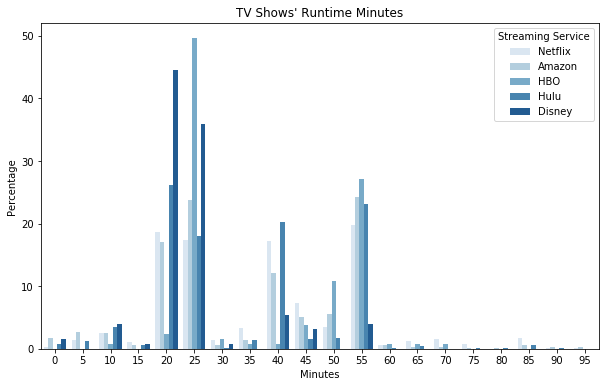

In [26]:
fig, ax = plt.subplots(figsize=(10,6))

sns.barplot(x=runtime_minutes["minutes_range"]
            , y=runtime_minutes["normalize"]
            , hue=runtime_minutes["streaming_service"]
            , palette="Blues"
           , ci=None)

ax.set_xlabel("Minutes")
ax.set_ylabel("Percentage")
ax.set_title("TV Shows' Runtime Minutes")

labels = [i for i in range(0,105, 5)]
ax.set_xticklabels(labels)

plt.legend(title="Streaming Service");

- Fromt the histogram above we can see that HBO has most TV shows that last from 25 to 30 minutes, as well as TV shows that last 50 to 60 minutes.

- Disney has the most TV shows that last between 20-25 minutes, and it is second to HBO for TV shows that last between 25-30 minutes.

- Most TV shows last from 20 to 30 minutes and from 40 to 55 minutes in general.

- Very few TV shows last more than 60 minutes or less than 20 minutes.

- Netflix, Hulu and Amazon seem to have very similar distributions of runtime minutes.